In [1]:
import tensorflow as tf 
from tensorflow.python import keras
import matplotlib.pyplot as plt
import cv2
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
import keras.utils as image
from PIL import Image
import scipy.integrate as integrate 

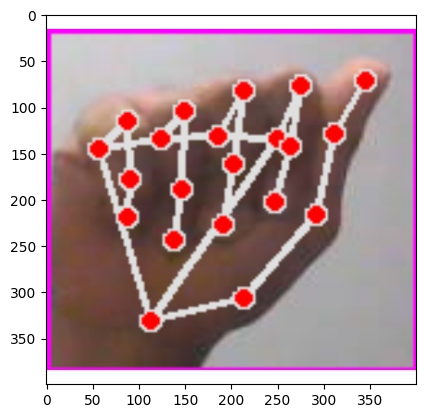

In [4]:
img= image.load_img(r"C:\Users\lENOVOO\Desktop\Mproject\Data\A\Image_2.jpg", )
plt.imshow(img)

In [5]:
cv2.imread(r"C:\Users\lENOVOO\Desktop\Mproject\Data\A\Image_2.jpg").shape

(400, 400, 3)

In [6]:
train = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\Data",target_size=(400,400),batch_size=60,class_mode='binary')

validation_dataset= train.flow_from_directory(r"C:\Users\lENOVOO\Desktop\Mproject\Vdata",target_size=(400,400),batch_size=60,class_mode='binary')

Found 200 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [8]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(400,400,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop( lr=0.001),
              metrics=['accuracy'])

c:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
model_fit= model.fit(train_dataset,
                     steps_per_epoch=3,
                     epochs=10,
                     validation_data= validation_dataset
                     )

Epoch 1/10
3/3 [==============================] - 130s 49s/step - loss: 23.6618 - accuracy: 0.5056 - val_loss: 0.1467 - val_accuracy: 0.9709
Epoch 2/10
3/3 [==============================] - 31s 14s/step - loss: 4.2621 - accuracy: 0.6786 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 16s 5s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 7.7781e-04 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 19s 7s/step - loss: 6.6458e-04 - accuracy: 1.0000 - val_loss: 9.3053e-05 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 19s 6s/step - loss: 7.7813e-05 - accuracy: 1.0000 - val_loss: 1.1814e-05 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 16s 5s/step - loss: 1.5516e-05 - accuracy: 1.0000 - val_loss: 3.4100e-06 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 16s 6s/step - loss: 7.2807e-06 - accuracy: 1.0000 - val_loss: 1.7145e-06 - val_accuracy: 1

In [1]:
import  cv2
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math 
import time 
import tensorflow as tf



detector= HandDetector(maxHands=1)
classifier = Classifier(r"C:\Users\lENOVOO\Desktop\Mproject\ModelNewNew\KKKeras.h5",r"C:\Users\lENOVOO\Desktop\Mproject\ModelNew\labels.txt")
cap= cv2.VideoCapture(0)
labels=["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y"]
folder = "Data/C"
counter=0
offset=20
imgSize=400

while  True:
    success , img=cap.read()
    hands, img=detector.findHands(img)
    
    if hands:
        hand=hands[0]
        x,y,w,h= hand['bbox']
        
        imgWhite=np.ones((imgSize, imgSize,3),np.uint8)*255
        imgCrop= img[y-offset:y+h+offset,x-offset:x+w+offset]
        
        imgCropShape=imgCrop.shape
        
        aspectRatio=h/w
        
        if aspectRatio>1:
            k=imgSize/h
            wCal=math.ceil(k*w)
            imgResize= cv2.resize(imgCrop,(wCal,imgSize))
            imgResizeShape=imgResize.shape
            wGap=math.ceil((imgSize-wCal)/2)
            imgWhite[:,wGap:wCal+wGap]=imgResize
            prediction ,index=classifier.getPrediction(imgWhite)
            print(prediction,index)
        else:
            k=imgSize/w
            hCal=math.ceil(k*h)
            imgResize= cv2.resize(imgCrop,(imgSize,hCal))
            imgResizeShape=imgResize.shape
            hGap=math.ceil((imgSize-hCal)/2)
            imgWhite[hGap:hCal+hGap,:]=imgResize
            prediction ,index=classifier.getPrediction(imgWhite)
            print(prediction,index)

        
        
        
        
        
        
        #cv2.putText(img,labels[index],(x,y-20),cv2.FONT_HERSHEY_COMPLEX,2,(255,0,255),2)
        cv2.imshow("white image",imgWhite)

    cv2.imshow("Image",img)
    cv2.waitKey(1)


C:\Users\lENOVOO\AppData\Local\Programs\Python\Python310\lib\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
